In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score


In [4]:
df = pd.read_csv("Mall_Customers.csv")

df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(r"[^a-z0-9]+", "_", regex=True)
              .str.strip("_")
)

print("Shape:", df.shape)
df


Shape: (200, 5)


,customerid,genre,age,annual_income_k,spending_score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


       customerid         age  annual_income_k  spending_score_1_100
count  200.000000  200.000000       200.000000            200.000000
mean   100.500000   38.850000        60.560000             50.200000
std     57.879185   13.969007        26.264721             25.823522
min      1.000000   18.000000        15.000000              1.000000
25%     50.750000   28.750000        41.500000             34.750000
50%    100.500000   36.000000        61.500000             50.000000
75%    150.250000   49.000000        78.000000             73.000000
max    200.000000   70.000000       137.000000             99.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   customerid            200 non-null    int64 
 1   genre                 200 non-null    object
 2   age                   200 non-null    int64 
 3   annual_income_k     

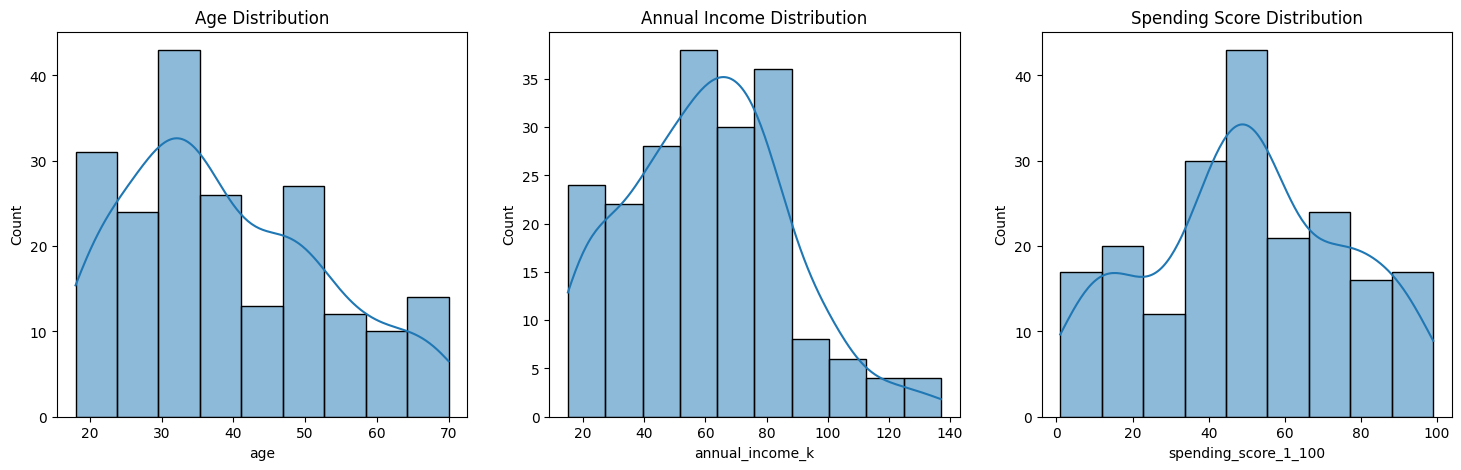

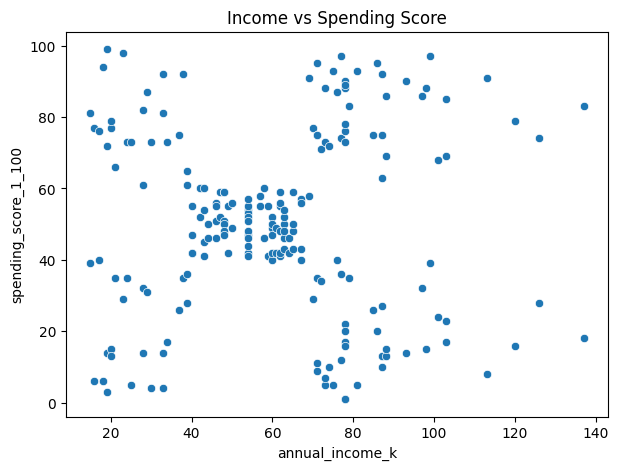

In [9]:
# Basic summary
print(df.describe())
print(df.info())

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df["age"], kde=True, ax=axes[0])
axes[0].set_title("Age Distribution")

sns.histplot(df["annual_income_k"], kde=True, ax=axes[1])
axes[1].set_title("Annual Income Distribution")

sns.histplot(df["spending_score_1_100"], kde=True, ax=axes[2])
axes[2].set_title("Spending Score Distribution")

plt.show()

# Scatter plot Income vs Spending Score
plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="annual_income_k",
    y="spending_score_1_100"
)
plt.title("Income vs Spending Score")
plt.show()


In [10]:
# Select features for clustering
features = df[["annual_income_k", "spending_score_1_100"]]

# Standardize them
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


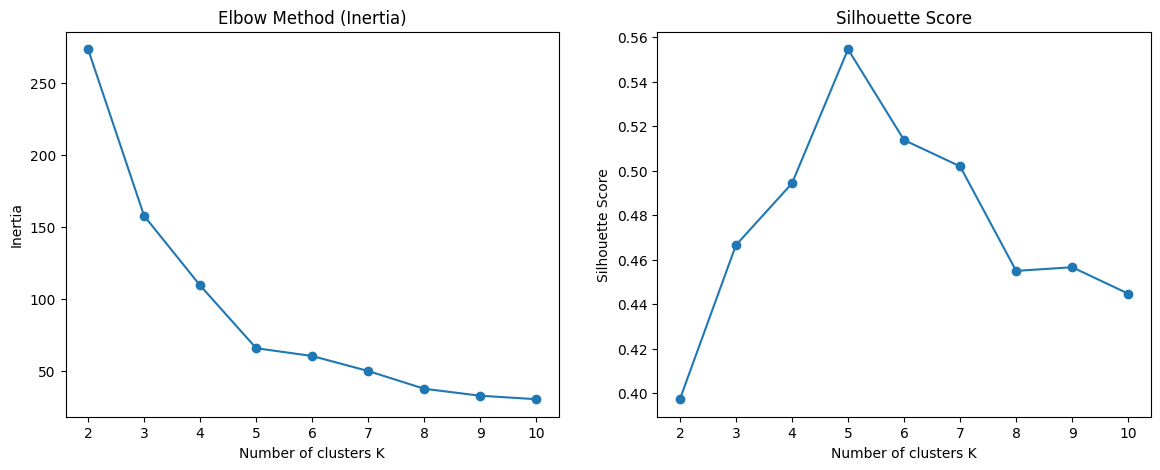

In [11]:
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(features_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(features_scaled, labels))

fig, ax1 = plt.subplots(1, 2, figsize=(14, 5))

# Elbow curve
ax1[0].plot(K_range, inertia, marker='o')
ax1[0].set_title("Elbow Method (Inertia)")
ax1[0].set_xlabel("Number of clusters K")
ax1[0].set_ylabel("Inertia")

# Silhouette score curve
ax1[1].plot(K_range, sil_scores, marker='o')
ax1[1].set_title("Silhouette Score")
ax1[1].set_xlabel("Number of clusters K")
ax1[1].set_ylabel("Silhouette Score")

plt.show()


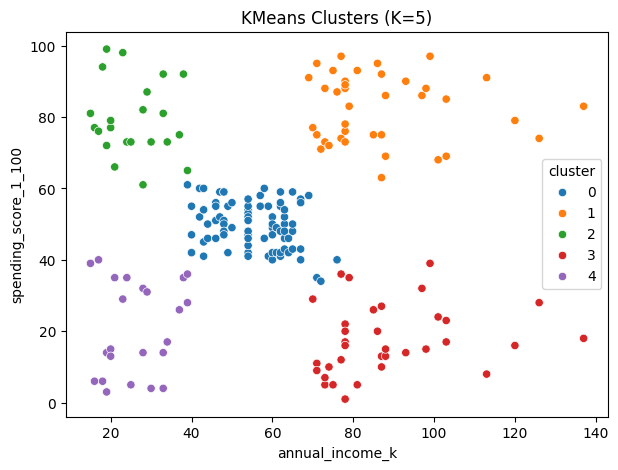

In [12]:
# Choose best_k from elbow + silhouette (often 5)
best_k = 5

kmeans = KMeans(n_clusters=best_k, random_state=42)
df["cluster"] = kmeans.fit_predict(features_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="annual_income_k",
    y="spending_score_1_100",
    hue="cluster",
    palette="tab10",
    legend='full'
)
plt.title(f"KMeans Clusters (K={best_k})")
plt.show()


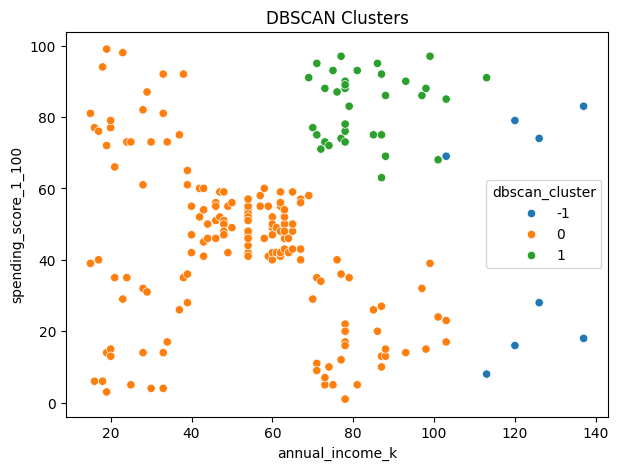

In [13]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["dbscan_cluster"] = dbscan.fit_predict(features_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(
    data=df,
    x="annual_income_k",
    y="spending_score_1_100",
    hue="dbscan_cluster",
    palette="tab10",
    legend='full'
)
plt.title("DBSCAN Clusters")
plt.show()


In [14]:
cluster_means = df.groupby("cluster")[["age", "annual_income_k", "spending_score_1_100"]].mean()
cluster_counts = df["cluster"].value_counts().sort_index()

print("Cluster means:\n", cluster_means)
print("\nCluster counts:\n", cluster_counts)


Cluster means:
                age  annual_income_k  spending_score_1_100
cluster                                                  
0        42.716049        55.296296             49.518519
1        32.692308        86.538462             82.128205
2        25.272727        25.727273             79.363636
3        41.114286        88.200000             17.114286
4        45.217391        26.304348             20.913043

Cluster counts:
 cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
